# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 2

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import copy
import matplotlib.pyplot as plt
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
def MLPReg(N2, momentum, learning_rate, epochs):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
def MLPClassif(N2, momentum, learning_rate, epochs):
    return MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

In [3]:
def MLPRegPeso(N2, momentum, learning_rate, epochs, gamma):
    return MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

def MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma):
    return MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=gamma, batch_size=1, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)

In [4]:
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, funcion_error):
    error_val = []
    error_train = []
    error_test = []
    min_error_val = float('inf')

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        aux_err_val = funcion_error(y_val, red.predict(X_val))

        if aux_err_val < min_error_val:
            min_error_val = aux_err_val
            best_red = copy.deepcopy(red)

        error_val.append(aux_err_val)
        error_train.append(funcion_error(y_train, red.predict(X_train)))
        error_test.append(funcion_error(y_test, red.predict(X_test)))

    return best_red, error_train, error_val, error_test

def error_regresion(y, y_pred):
    return sk.metrics.mean_squared_error(y, y_pred)

def error_clasificacion(y, y_pred):
    return sk.metrics.zero_one_loss(y, y_pred)

def entrenar_red_regresion(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(regr, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_regresion)

def entrenar_red_clasificacion(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    return entrenar_red(clasif, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test, error_clasificacion)

In [5]:
def entrenar_red_peso(red, evaluaciones, X_train, y_train, X_test, y_test):
    error_train = []
    error_test = []
    weight_sum = []

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        weights = red.coefs_
        weight_sum.append(sum(np.sum(np.square(w)) for w in weights))
        error_train.append(sk.metrics.mean_squared_error(y_train, red.predict(X_train)))
        error_test.append(sk.metrics.mean_squared_error(y_test, red.predict(X_test)))

    return red, error_train, error_test, weight_sum

In [6]:
def plot_errors(ax, error_train, error_val, error_test, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    ax.plot(rango, error_val, label='Error de Validacion', color='blue', linestyle="-")
    ax.plot(rango, error_test, label='Error de Test', color='green', linestyle="-")
    ax.legend()

def plot_errors_peso(ax, error_train, error_test, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, error_train, label='Error de Entrenamiento', color='red', linestyle="-")
    ax.plot(rango, error_test, label='Error de Test', color='green', linestyle="-")
    ax.legend()

def plot_weight_sum(ax, weight_sum, epocas, evaluaciones, title):
    rango = np.array(range(evaluaciones)) * epocas
    ax.set_title(title)
    ax.plot(rango, weight_sum, label='Suma de Pesos', color='blue', linestyle="-")
    ax.legend()


## Ejercicio 1

In [7]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0

  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

In [8]:
espiralesTrain = espirales(600)
espiralesTest = espirales(2000)

X_t = espiralesTrain.drop(columns=['class'])
y_t = espiralesTrain['class']
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X_t, y_t, test_size=0.2)

X_test = espiralesTest.drop(columns=['class'])
y_test = espiralesTest['class']

In [9]:
N2List = [2, 10, 20, 40]
learning_rate = 0.1
momentum = 0.9
epochs = 20
evals = 1000

error_train_list = []
error_val_list = []
error_test_list = []

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for idx, N2 in enumerate(N2List):
    clasif = MLPClassif(N2, momentum, learning_rate, epochs)
    best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
    ax = axs[idx // 2, idx % 2]
    ax.scatter(X_test['dim_0'], X_test['dim_1'], c=best_red.predict(X_test), cmap='coolwarm')
    ax.set_title(f'Espirales Predicciones {N2} Neuronas Capa Intermedia')
    error_train_list.append(error_clasificacion(y_train, best_red.predict(X_train)))
    error_val_list.append(error_clasificacion(y_val, best_red.predict(X_val)))
    error_test_list.append(error_clasificacion(y_test, best_red.predict(X_test)))

plt.tight_layout()

fig_large, ax_large = plt.subplots(figsize=(20, 5))
ax_large.plot(N2List, error_train_list, label='Error de Entrenamiento', color='red', linestyle=":", marker='o')
ax_large.plot(N2List, error_val_list, label='Error de Validacion', color='blue', linestyle="-.", marker='o')
ax_large.plot(N2List, error_test_list, label='Error de Test', color='green', linestyle="-", marker='o')
ax_large.set_xticks(N2List, labels=[str(N_2) for N_2 in N2List])
ax_large.legend()
ax_large.set_title('Errores Segun Cantidad de Neuronas en Capa Intermedia')

plt.show()


A medida que aumentamos la cantidad de neuronas en la capa intermedia, los errores producidos por las redes tienden a disminuir. <br>
Además, al observar el gráfico de la clasificación generada por las predicciones de las redes, se puede notar que, con un mayor número de neuronas en la capa intermedia, las predicciones se asemejan más al espiral ideal.

## Ejercicio 2


In [10]:
csv = pd.read_csv('DataSets/dos_elipses.data', names=['dim_0', 'dim_1', 'class']).sample(n=500)
X = csv.drop(columns=['class'])
y = csv['class']

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

csv = pd.read_csv('DataSets/dos_elipses.test', names=['dim_0', 'dim_1', 'class']).sample(n=2000)
X_test = csv.drop(columns=['class'])
y_test = csv['class']

In [11]:
N2 = 6
learning_rates = [0.1, 0.05, 0.01]
momentums = [0.55, 0.75, 0.95]
epochs = 50
evals = 300

In [12]:
table = []
best_reds = {}

for learning_rate in learning_rates:
    for momentum in momentums:
        aux_error_test_proms = []
        min_error_test = float('inf')
        for i in range(10):
            clasif = MLPClassif(N2, momentum, learning_rate, epochs)
            best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

            aux_error_test = error_clasificacion(y_test, best_red.predict(X_test))
            if aux_error_test < min_error_test:
                min_error_test = aux_error_test
                true_best_red = (best_red, error_train, error_val, error_test)

            aux_error_test_proms.append(aux_error_test)
            
        best_reds[(learning_rate,momentum)] = true_best_red
        table.append((learning_rate, momentum, np.mean(aux_error_test_proms), min_error_test))

print("Errores Test\n")
table = pd.DataFrame(table, columns=['Learning Rate', 'Momentum', 'Error Promedio', 'Error Minimo'])
print(table)

Errores Test

   Learning Rate  Momentum  Error Promedio  Error Minimo
0           0.10      0.55         0.08325        0.0165
1           0.10      0.75         0.07615        0.0170
2           0.10      0.95         0.12155        0.0440
3           0.05      0.55         0.10490        0.0115
4           0.05      0.75         0.08960        0.0175
5           0.05      0.95         0.12205        0.0460
6           0.01      0.55         0.19295        0.1880
7           0.01      0.75         0.19030        0.1595
8           0.01      0.95         0.07150        0.0175


Elegimos un valor de eta = 0.01 y un alpha = 0.95 como mejores parametros, ya que tiene el menor error promedio.

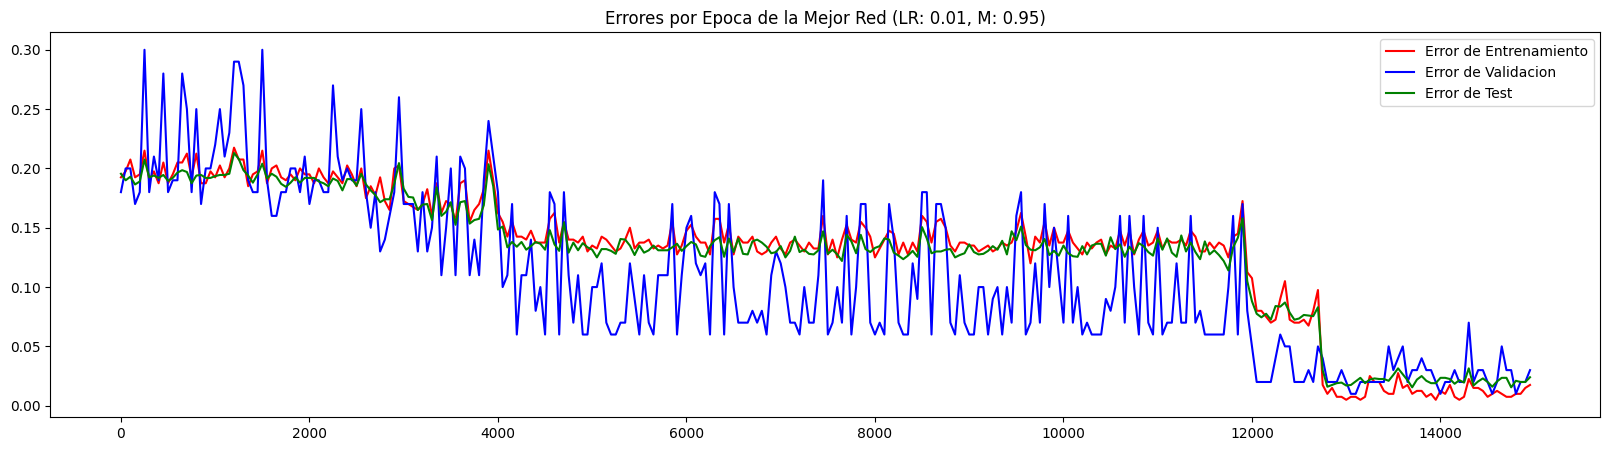

In [13]:
mejor_LR = 0.01
mejor_M = 0.95

fig_large, ax_large = plt.subplots(figsize=(20, 5))
best_red, error_train, error_val, error_test = best_reds[(mejor_LR, mejor_M)]
plot_errors(ax_large, error_train, error_val, error_test, epochs, evals, f'Errores por Epoca de la Mejor Red (LR: {mejor_LR}, M: {mejor_M})')

Se observa un descenso significativo en el error alrededor de las 12000 épocas. Es posible que antes de este punto el modelo estuviera atrapado en un mínimo local, lo que impedía que el error disminuyera a lo largo de las iteraciones.

## Ejercicio 3

In [14]:
data = pd.DataFrame(np.loadtxt('DataSets/ikeda.data'))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/ikeda.test')).sample(n=2000)
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

In [15]:
N2 = 30
learning_rate = 0.01
momentum = 0.9
epochs = 50
evals = 400
test_sizes = [0.05, 0.25, 0.5]

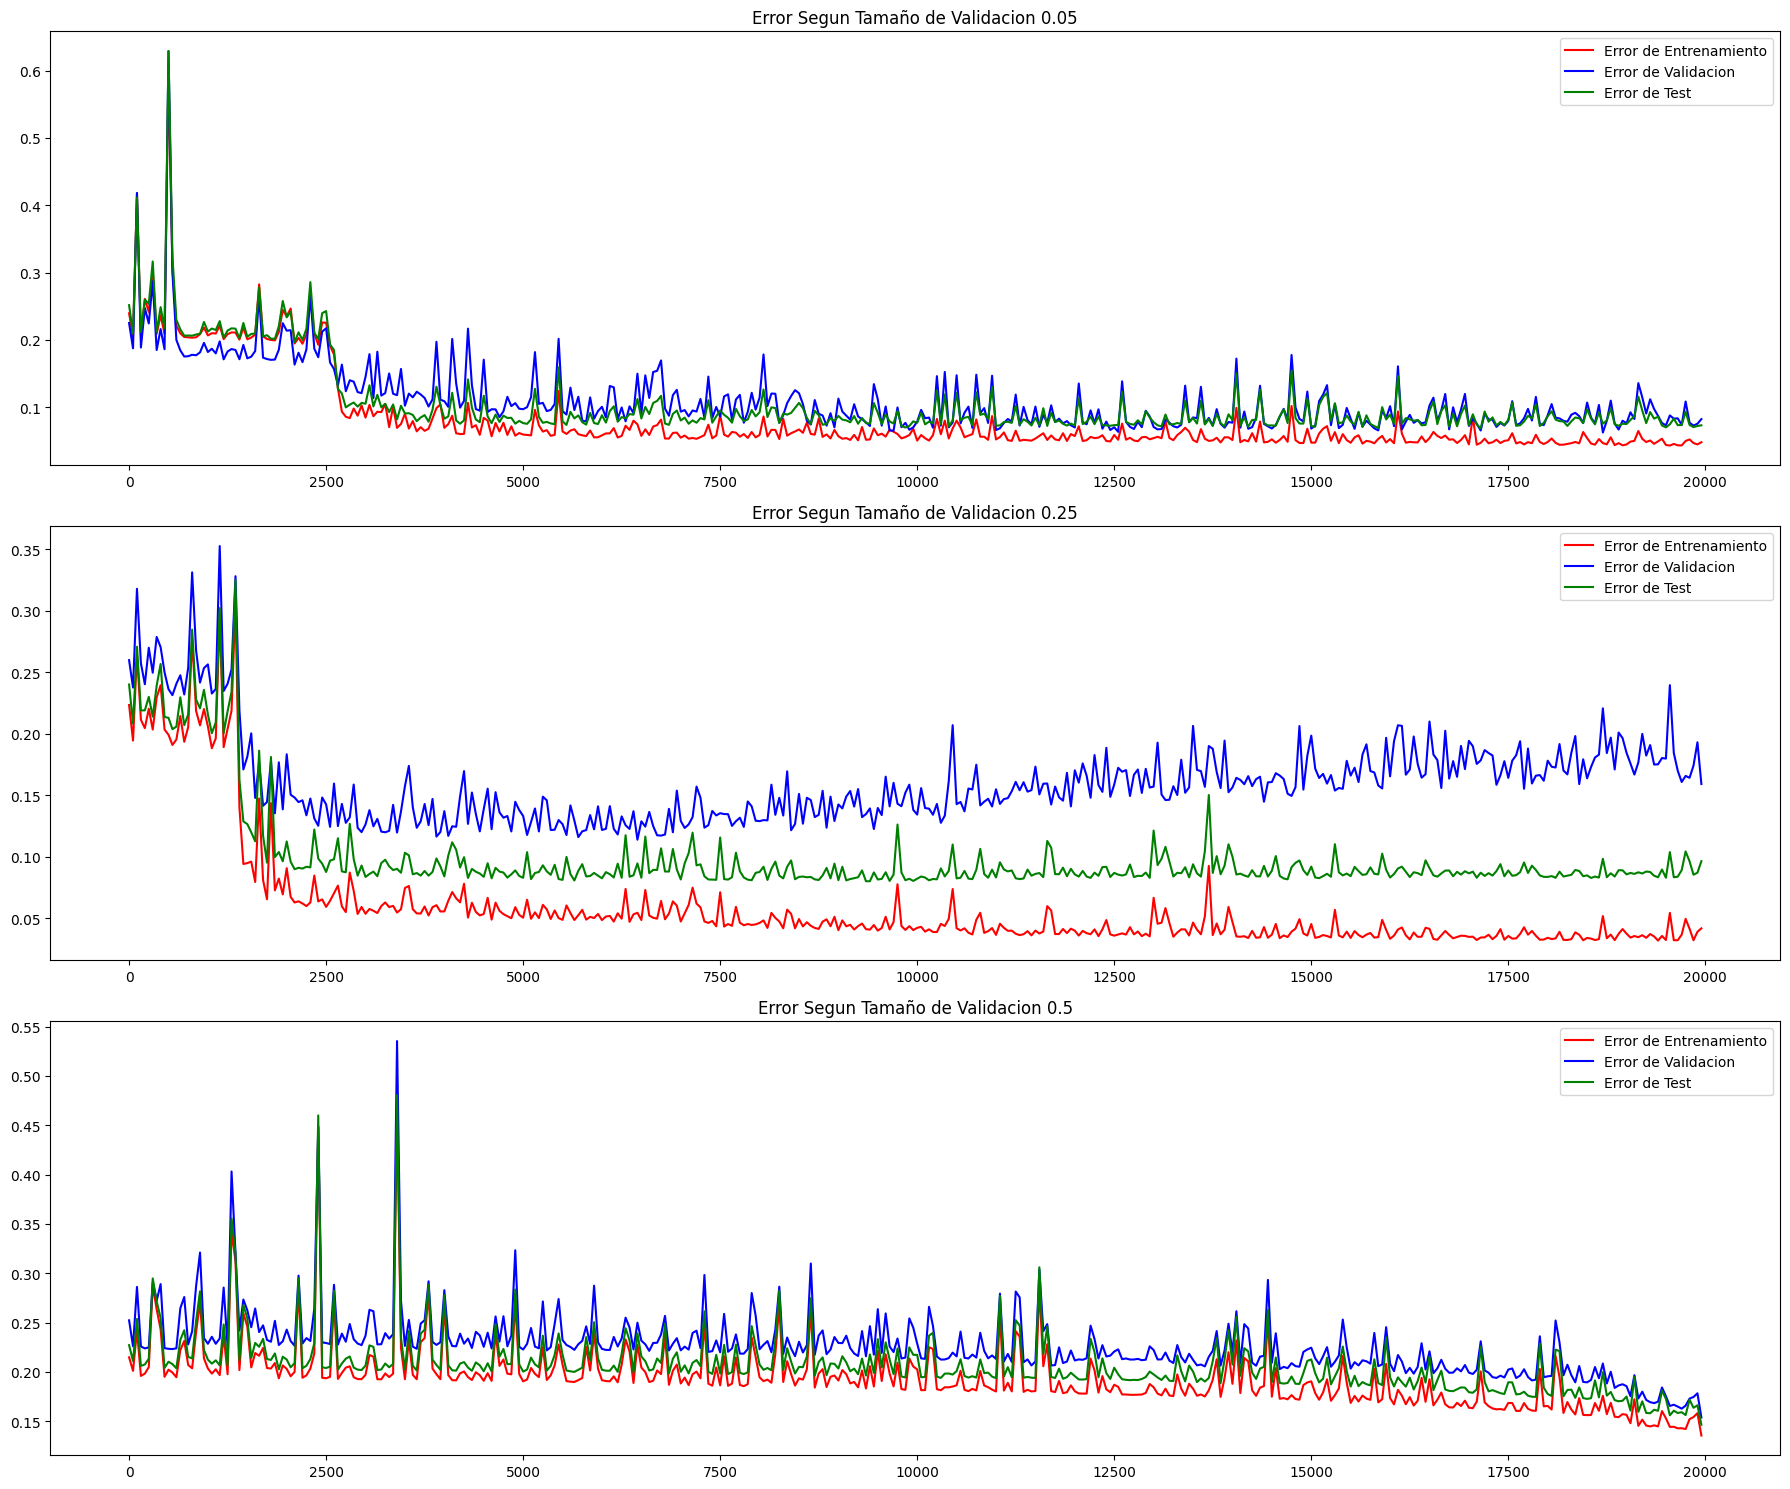

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(18, 15))

error_train_proms = []
error_val_proms = []
error_test_proms = []

for idx, test_size in enumerate(test_sizes):
        reg = MLPReg(N2, momentum, learning_rate, epochs)
        X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=test_size)
        best_red, error_train, error_val, error_test = entrenar_red_regresion(reg, evals, X_train, y_train, X_val, y_val, X_test, y_test)
        ax = axs[idx]
        plot_errors(ax, error_train, error_val, error_test, epochs, evals, f'Error Segun Tamaño de Validacion {test_size}')

plt.tight_layout()
plt.show()

Se observa que con un tamaño de validación pequeño, como 0.05, se produce cierto sobreajuste, ya que este conjunto no es suficientemente representativo del comportamiento del modelo sobre datos no vistos, lo que resulta en muchas fluctuaciones en el error. <br>
 Por otro lado, con un tamaño de validación muy grande, como 0.5, el modelo no tiene suficientes datos para entrenar adecuadamente, lo que provoca una tasa de error mucho mayor.

## Ejercicio 4

In [25]:
N2 = 6
learning_rate = 0.05
momentum = 0.3
epochs = 20
evals = 4000
gammas = [(10**(-x)) for x in range(0, 7)]

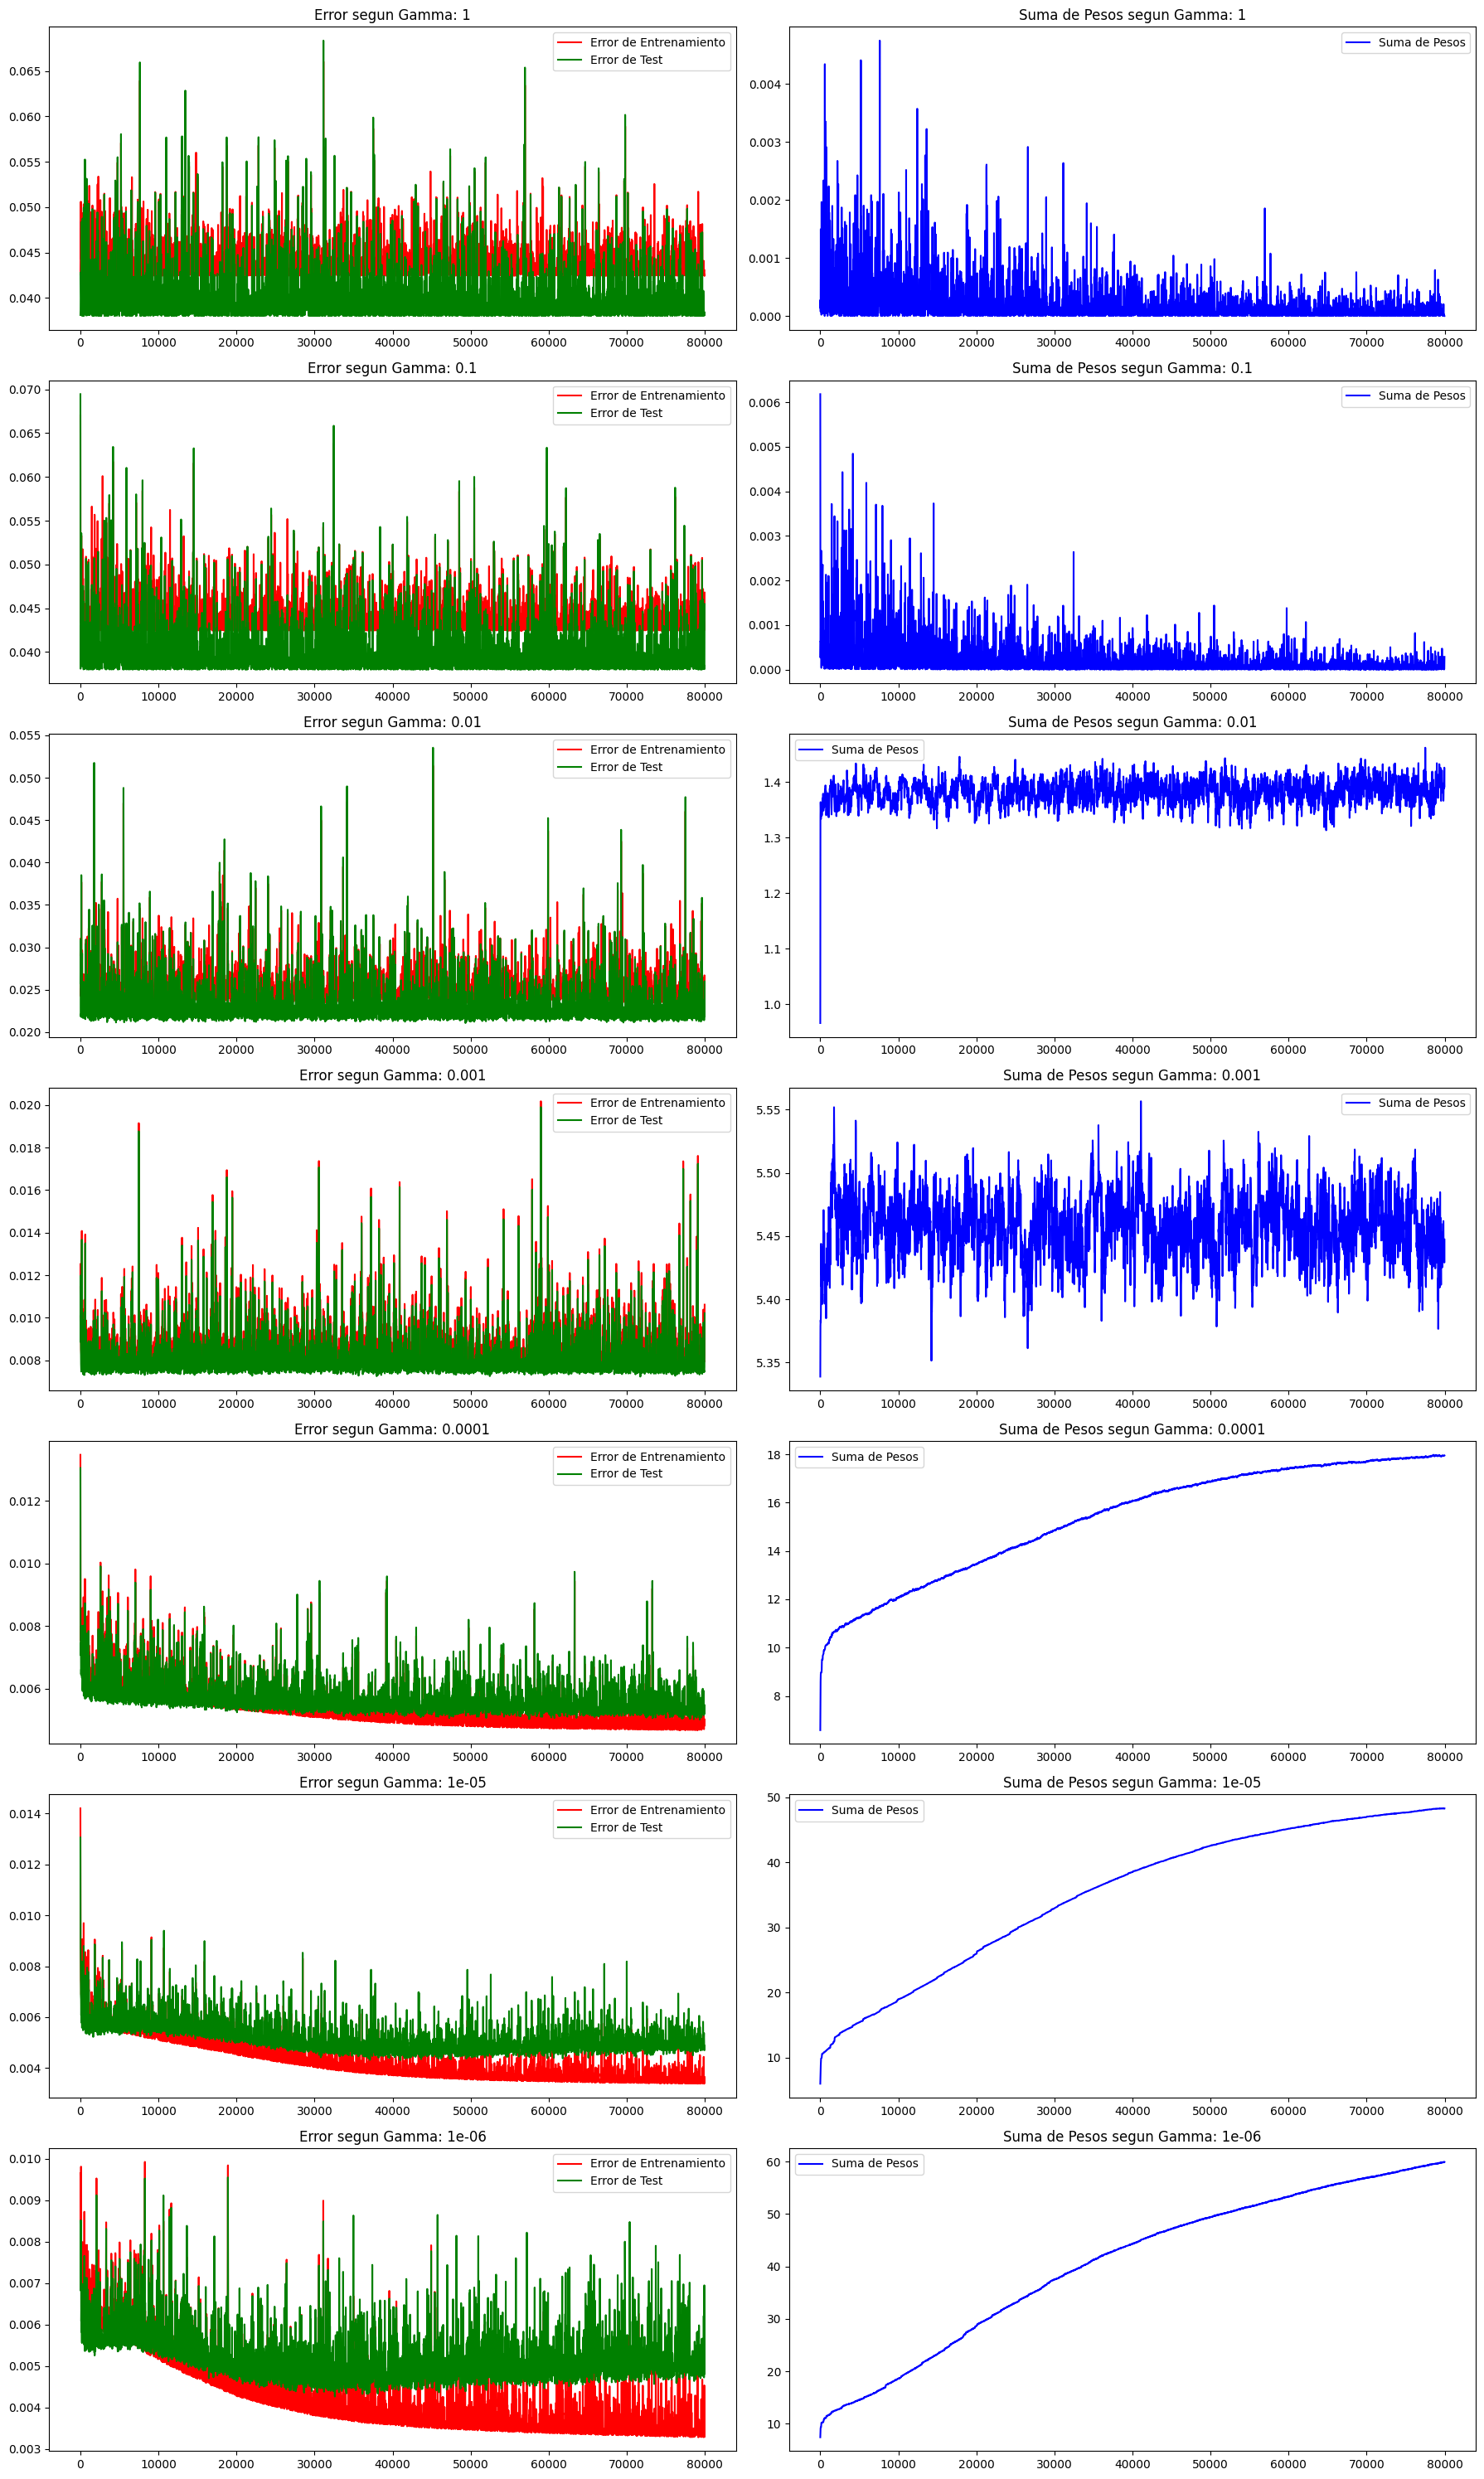

In [27]:
data = pd.DataFrame(np.loadtxt('DataSets/ssp.data', delimiter = ','))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/ssp.test', delimiter = ','))
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

fig, axs = plt.subplots(7, 2, figsize=(18, 30))
for idx, gamma in enumerate(gammas):
    reg = MLPRegPeso(N2, momentum, learning_rate, epochs, gamma)
    best_red, error_train, error_test, weight_sum = entrenar_red_peso(reg, evals, X, y, X_test, y_test)
    plot_errors_peso(axs[idx, 0], error_train, error_test, epochs, evals, f'Error segun Gamma: {gamma}')
    plot_weight_sum(axs[idx, 1], weight_sum, epochs, evals, f'Suma de Pesos segun Gamma: {gamma}')

plt.tight_layout()
plt.show()

## Ejercicio 5

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dimensiones = [2, 4, 8, 16, 32]
dataDiagonalesTree = []
dataParalelasTree = []
overlap = 0.78
testSamples = 10000

In [21]:
N2 = 6
learning_rate = 0.025
momentum = 0.85
gamma = 0.00001
epochs = 40
evals = 400
dataDiagonalesRed = []
dataParalelasRed = []

### Diagonales

In [22]:
def diagonales(n, d, C):
  half = int(n/2)

  mClass0 = -np.ones(d)
  mClass1 = np.ones(d)
  covM = np.identity(d) * (C**2 * d)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

In [23]:
for dimension in dimensiones:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']

        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataDiagonalesTree.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

        clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
        best_red, _, _, _ = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)
        errTest = error_clasificacion(y_test, best_red.predict(X_test))
        errEntrenamiento = error_clasificacion(y, best_red.predict(X))
        weight_sum = sum(np.sum(np.square(w)) for w in best_red.coefs_)
        dataDiagonalesRed.append([dimension, conjunto, errTest, errEntrenamiento, weight_sum])

### Paralelas

In [24]:
def paralelas(n, d, C):
  half = int(n/2)

  mClass0 = np.zeros(d)
  mClass0[0] = 1
  mClass1 = np.zeros(d)
  mClass1[0] = -1
  covM = np.identity(d) * (C**2)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

In [25]:
for dimension in dimensiones:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataParalelasTree.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

        clasif = MLPClassifPeso(N2, momentum, learning_rate, epochs, gamma)
        best_red, _, _, _ = entrenar_red_peso(clasif, evals, X, y, X_test, y_test)
        errTest = error_clasificacion(y_test, best_red.predict(X_test))
        errEntrenamiento = error_clasificacion(y, best_red.predict(X))
        weight_sum = sum(np.sum(np.square(w)) for w in best_red.coefs_)
        dataParalelasRed.append([dimension, conjunto, errTest, errEntrenamiento, weight_sum])

### Resultados

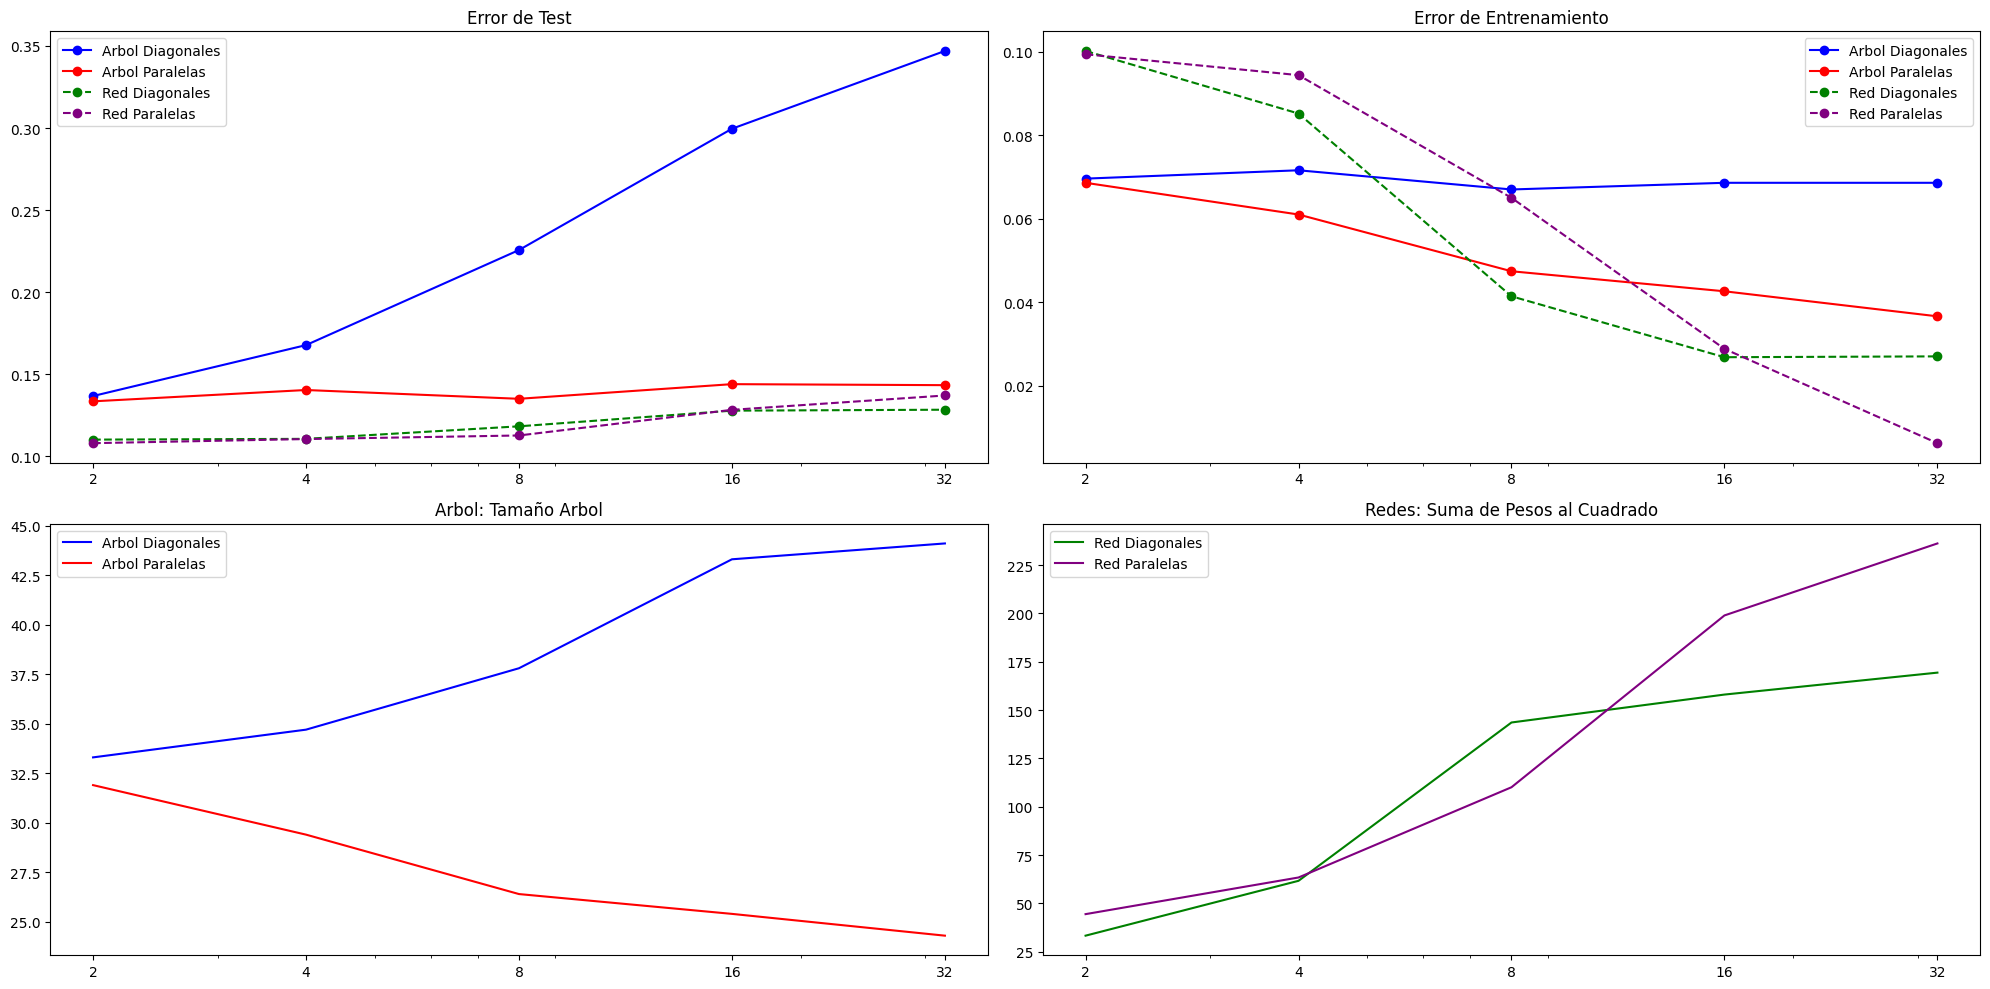

In [30]:
dfDiagonalesTree = pd.DataFrame(dataDiagonalesTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
dfParalelasTree = pd.DataFrame(dataParalelasTree, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
promsErrTestDiagonalesTree = dfDiagonalesTree.groupby('dimension')['errTest'].mean()
promsErrTestParalelasTree = dfParalelasTree.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonalesTree = dfDiagonalesTree.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelasTree = dfParalelasTree.groupby('dimension')['errEntrenamiento'].mean()

dfDiagonalesRed = pd.DataFrame(dataDiagonalesRed, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'weight_sum'])
dfParalelasRed = pd.DataFrame(dataParalelasRed, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'weight_sum'])
promsErrTestDiagonalesRed = dfDiagonalesRed.groupby('dimension')['errTest'].mean()
promsErrTestParalelasRed = dfParalelasRed.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonalesRed = dfDiagonalesRed.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelasRed = dfParalelasRed.groupby('dimension')['errEntrenamiento'].mean()

treeSizeDiagonal = dfDiagonalesTree.groupby('dimension')['treeSize'].mean()
treeSizeParalelas = dfParalelasTree.groupby('dimension')['treeSize'].mean()
redWeightSumDiagonal = dfDiagonalesRed.groupby('dimension')['weight_sum'].mean()
redWeightSumParalelas = dfParalelasRed.groupby('dimension')['weight_sum'].mean()

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0,0].plot(dimensiones, promsErrTestDiagonalesTree, c='blue', label='Arbol Diagonales', marker='o', linestyle="-")
axs[0,0].plot(dimensiones, promsErrTestParalelasTree, c='red', label='Arbol Paralelas', marker='o', linestyle="-")
axs[0,0].plot(dimensiones, promsErrTestDiagonalesRed, c='green', label='Red Diagonales', marker='o', linestyle="--")
axs[0,0].plot(dimensiones, promsErrTestParalelasRed, c='purple', label='Red Paralelas', marker='o', linestyle="--")
axs[0,0].legend()
axs[0,0].set_xscale('log')
axs[0,0].set_title('Error de Test')
axs[0,0].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[0,1].plot(dimensiones, promsErrEntrenamientoDiagonalesTree, c='blue', label='Arbol Diagonales', marker='o', linestyle="-")
axs[0,1].plot(dimensiones, promsErrEntrenamientoParalelasTree, c='red', label='Arbol Paralelas', marker='o', linestyle="-")
axs[0,1].plot(dimensiones, promsErrEntrenamientoDiagonalesRed, c='green', label='Red Diagonales', marker='o', linestyle="--")
axs[0,1].plot(dimensiones, promsErrEntrenamientoParalelasRed, c='purple', label='Red Paralelas', marker='o', linestyle="--")
axs[0,1].legend()
axs[0,1].set_xscale('log')
axs[0,1].set_title('Error de Entrenamiento')
axs[0,1].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[1,0].plot(dimensiones, treeSizeDiagonal, c='blue', label='Arbol Diagonales')
axs[1,0].plot(dimensiones, treeSizeParalelas, c='red', label='Arbol Paralelas')
axs[1,0].legend()
axs[1,0].set_xscale('log')
axs[1,0].set_title('Arbol: Tamaño Arbol')
axs[1,0].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[1,1].plot(dimensiones, redWeightSumDiagonal, c='green', label='Red Diagonales')
axs[1,1].plot(dimensiones, redWeightSumParalelas, c='purple', label='Red Paralelas')
axs[1,1].legend()
axs[1,1].set_xscale('log')
axs[1,1].set_title('Redes: Suma de Pesos al Cuadrado')
axs[1,1].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

plt.tight_layout()
plt.show()

## Ejercicio 6

In [16]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [11]:
N2 = 6
learning_rate = 0.025
momentum = 0.85
epochs = 40
evals = 400

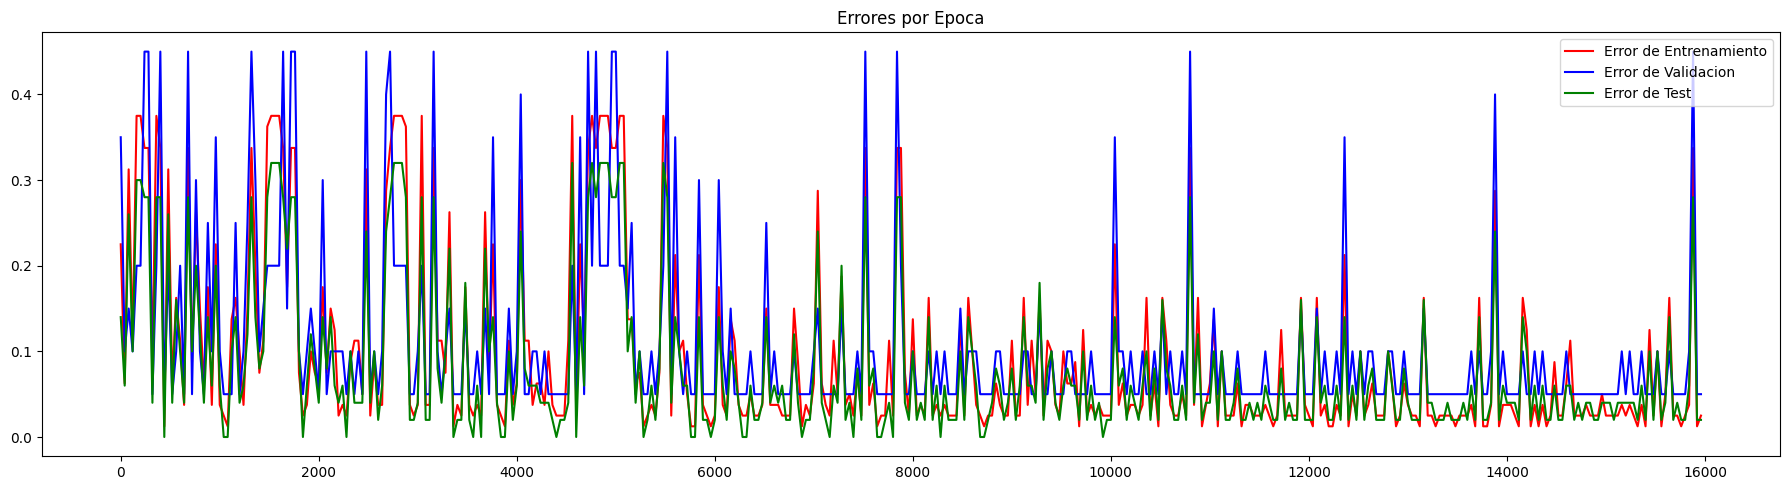

In [12]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X, X_test, y, y_test = sk.model_selection.train_test_split(iris_df[iris.feature_names], iris_df['target'], test_size=1/3)
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

fig, axs = plt.subplots(1, 1, figsize=(18, 5))

clasif = MLPClassif(N2, momentum, learning_rate, epochs)
best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
plot_errors(axs, error_train, error_val, error_test, epochs, evals, 'Errores por Epoca Iris')

plt.tight_layout()
plt.show()


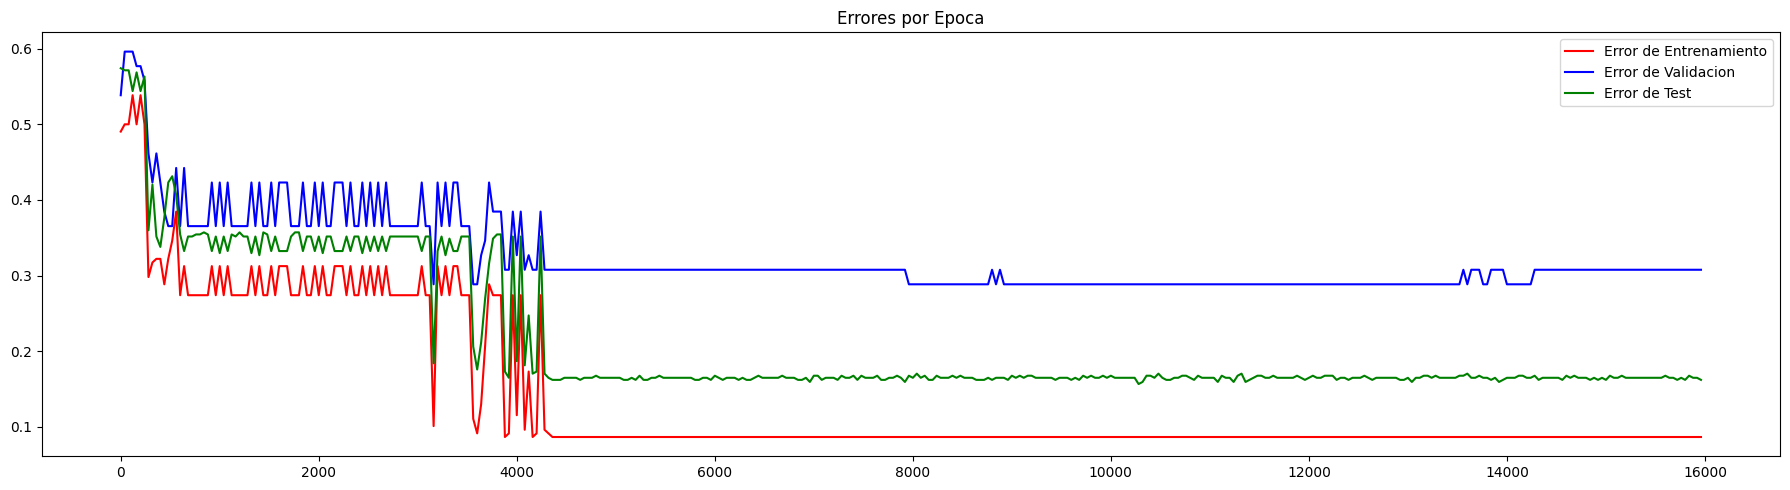

In [18]:
data = pd.DataFrame(np.loadtxt('DataSets/faces.data', delimiter = ','))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/faces.test', delimiter = ','))
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fig, axs = plt.subplots(1, 1, figsize=(18, 5))

clasif = MLPClassif(N2, momentum, learning_rate, epochs)
best_red, error_train, error_val, error_test = entrenar_red_clasificacion(clasif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
plot_errors(axs, error_train, error_val, error_test, epochs, evals, 'Errores por Epoca Faces')

plt.tight_layout()
plt.show()

## Ejercicio 7

In [21]:
N2 = 6
learning_rate = 0.05
momentum = 0.3
epochs = 200
evals = 2000
batch_sizes = [1, 5, 20]

ValueError: x and y must have same first dimension, but have shapes (2000,) and (400,)

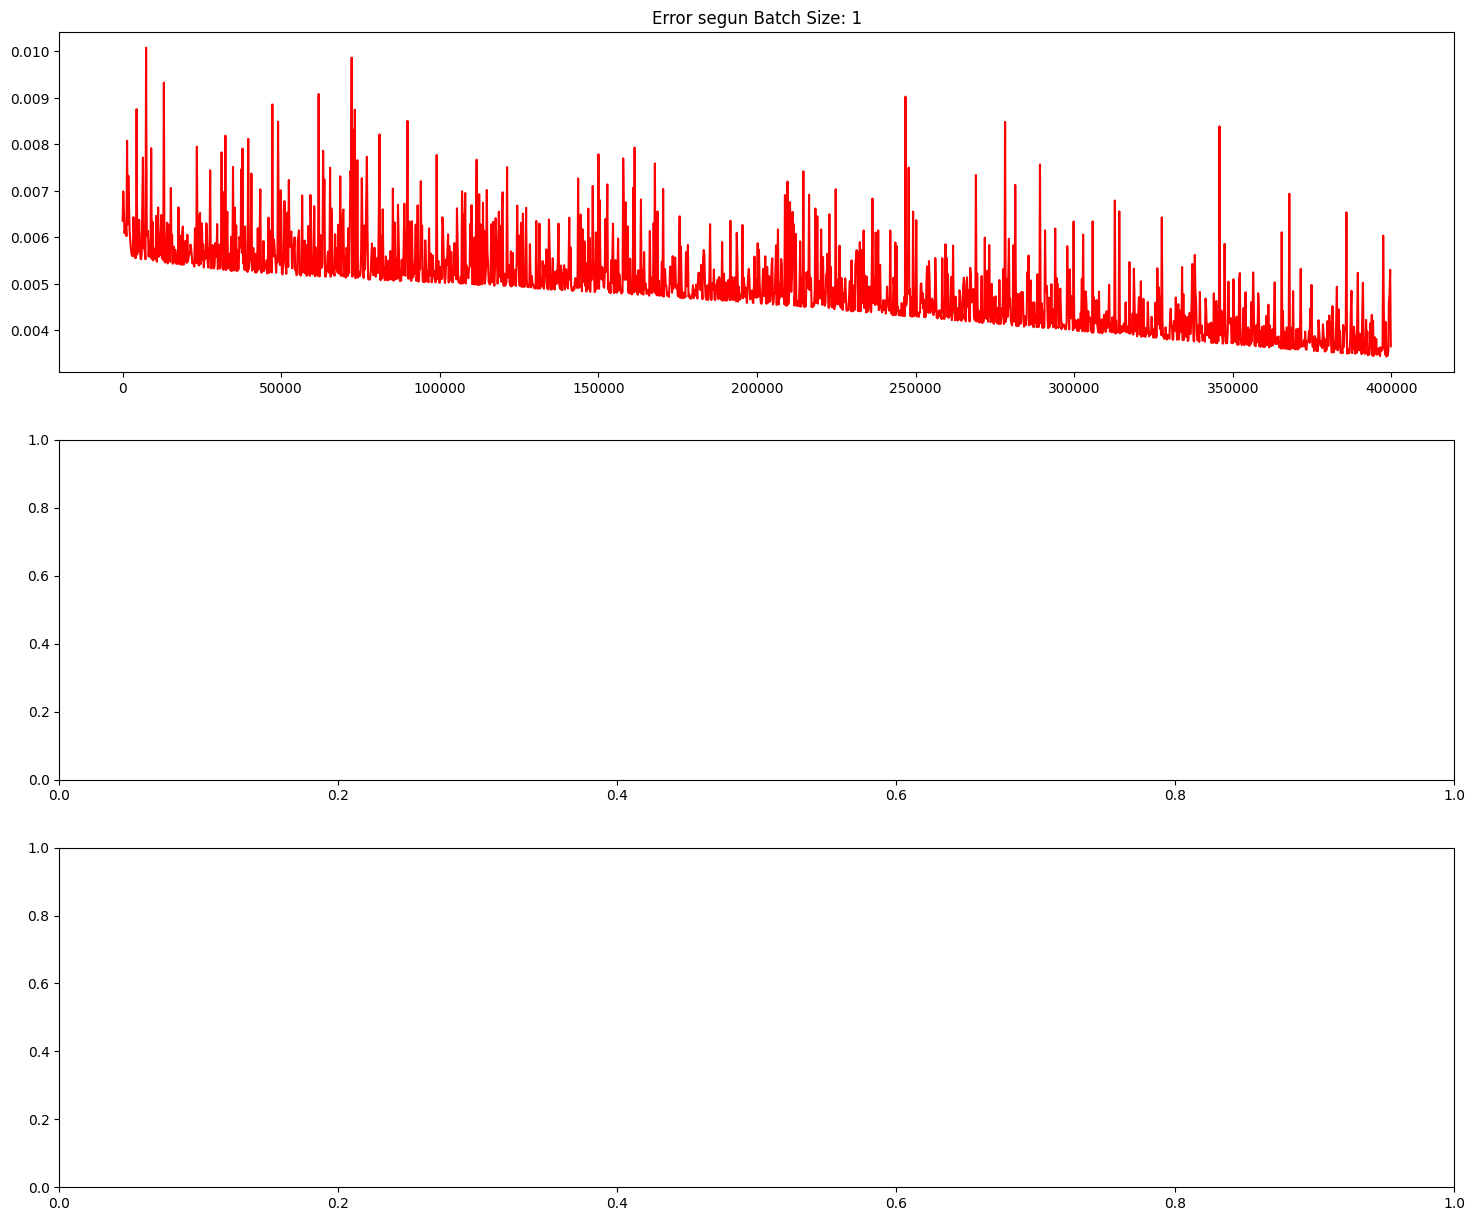

In [23]:
data = pd.DataFrame(np.loadtxt('DataSets/ssp.data', delimiter = ','))
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

data = pd.DataFrame(np.loadtxt('DataSets/ssp.test', delimiter = ','))
X_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2)

fig, axs = plt.subplots(3, 1, figsize=(18, 15))
for idx, batch in enumerate(batch_sizes):
    reg = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=batch, learning_rate='constant', learning_rate_init=learning_rate,momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epochs)
    best_red, error_train, error_test, weight_sum = entrenar_red_regresion(reg, evals, X_train, y_train, X_val, y_val, X_test, y_test)
    plot_errors(axs[idx], error_train, error_val, error_test, epochs, evals, f'Error segun Batch Size: {batch}')

plt.tight_layout()
plt.show()